# **Exercício Prático 01 - Regressão Linear e Regressão Ridge**
## Aprendizado de Máquina A
### **Professor(es):** Gisele Lobo Pappa e Lourenço Ribeiro Grossi Araújo
### **Aluno:** Bernardo Reis de Almeida

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

np.random.seed(24)

#### **Leitura dos Dados**

In [2]:
# Reading all the data from csv
first_section_data = pd.read_csv("./dados/secao1.csv").to_numpy()
second_section_data = pd.read_csv("./dados/secao2.csv").to_numpy()
third_section_data = pd.read_csv("./dados/secao3.csv").to_numpy()

#### **OLS 1D - Solução Fechada, Métricas e Visualização**

In [3]:
# Defines the linear regression model
# It expects numpy arrays as input
class LinearRegression:
    def __init__(self):
        self.coef = None

    def fit(self, X, y):
        # Applies the closed formula in order to generate the coefficients
        # according to a least squares fit
        self.coef = np.linalg.inv((X.T @ X)) @ X.T @ y

    def predict(self, x):
        return x @ self.coef

    def mse(self, X, y):
        y_hat = self.predict(X)
        return np.mean(np.pow(y - y_hat, 2))

    def mae(self, X, y):
        y_hat = self.predict(X)
        return np.mean(np.abs(y - y_hat))

    def r2(self, X, y):
        y_hat = self.predict(X)
        y_mean = np.mean(y)
        return 1 - (np.sum(np.pow((y - y_hat), 2)) / np.sum(np.pow((y - y_mean), 2)))

##### **Tarefa A**

In [4]:
# Creates X and y
# An intercept column of 1's is added to X
X = first_section_data[:, :-1]
X = np.concat([np.ones((X.shape[0], 1)), X], axis=1)
y = first_section_data[:, -1:]

# Instantiates and fits the model
first_section_model = LinearRegression()
first_section_model.fit(X, y)

# Presents the coefficients in table form
coef = first_section_model.coef.flatten()
coef = pd.DataFrame.from_dict(
    {"OLS": coef},
    columns=[f"β{i}" for i in range(len(coef))],
    orient="index",
)
display(coef)

,β0,β1
OLS,2.490985,1.698595


Foram obtidos os seguintes valores para os coeficientes:

- **β0** = 2.490985
- **β1** = 1.698595

##### **Tarefa B**

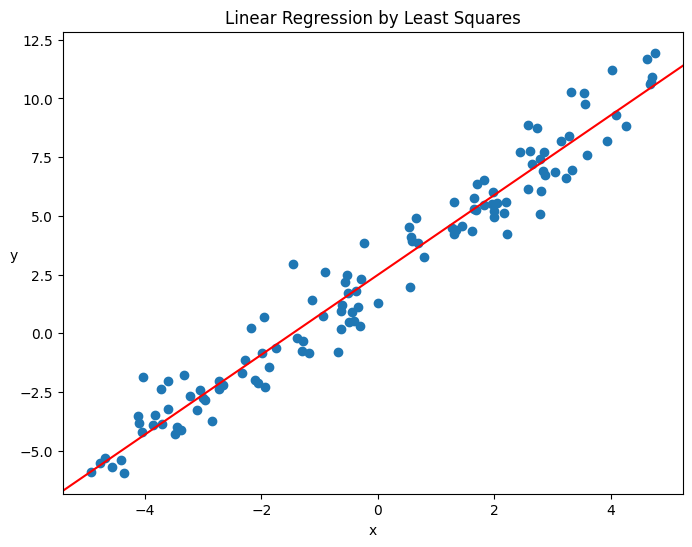

In [5]:
# Generates a line representing the fitted model
start = np.array([[0], [1]])
end = first_section_model.predict(
    np.concat([np.ones((start.shape[0], 1)), start], axis=1)
)
fit_line = np.concat([start, end], axis=1)

# Plots the fitted model and the original data
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax.scatter(first_section_data[:, 0], first_section_data[:, -1])
ax.axline(fit_line[0], fit_line[1], color="red")

ax.set_title("Linear Regression by Least Squares")
ax.set_xlabel("x")
ax.set_ylabel("y", rotation=0)

plt.show()
plt.close()

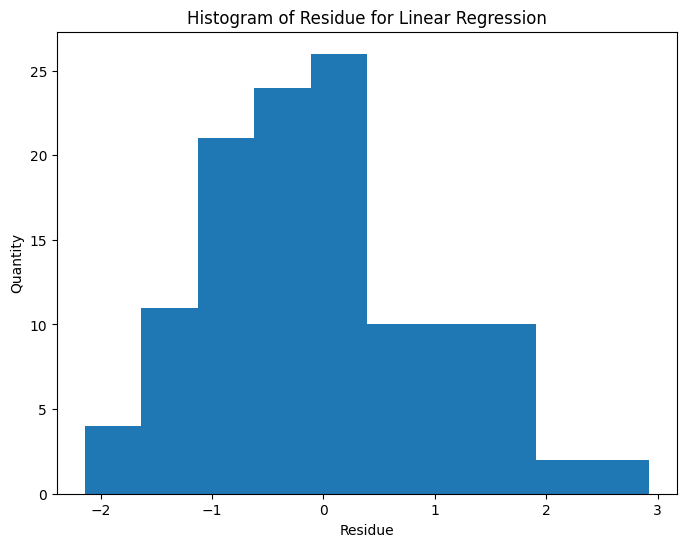

In [6]:
# Calculates the magnitude of the residue
residue = []
for i in range(X.shape[0]):
    y_hat = first_section_model.predict(X[i])
    residue.append((y[i] - y_hat)[0])

# Plots a histogram of residue
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax.hist(residue)

ax.set_title("Histogram of Residue for Linear Regression")
ax.set_xlabel("Residue")
ax.set_ylabel("Quantity")

plt.show()
plt.close()

Os gráficos acima apresentam, respectivamente, o ajuste do modelo aos dados e o histograma de resíduos obtidos. É possível observar que os resíduos aparentam seguir aproximadamente uma distribuição normal.

##### **Tarefa C**

In [7]:
# Calculating various metrics
mse = first_section_model.mse(X, y)
mae = first_section_model.mae(X, y)
r2 = first_section_model.r2(X, y)

# Presenting them in table form
metrics = pd.DataFrame.from_dict(
    {"OLS": [mse, mae, r2]},
    columns=["MSE", "MAE", "R^2"],
    orient="index",
)
display(metrics)

,MSE,MAE,R^2
OLS,1.01547,0.802501,0.954779


A partir dos resultados acima, é possível observar que o modelo obtido foi bem razoável, com valores bons para todas as métricas. Em particular, um valor de R^2 próximo de 1 indica que o ajuste linear foi bem adequado aos dados, explicando a maior parte de sua variabilidade.

##### **Tarefa D**

*Desenho anexado no .pdf*

##### **Tarefa E**

O modelo de regressão linear, como o próprio nome sugere, propõe uma modelagem linear para o problema de regressão. Isto é, sendo Y uma variável aleatória tal que $Y=f(x)+e$, ele busca aproximar a função $f(x)$ por uma função $ŷ=β₀+βx$, de tal forma que $ŷ \approx y$ para todos os $y \sim Y$ da base de dados de treino utilizada. Essa aproximação, por sua vez, é feita sob uma função objetivo, a qual, no caso deste exercício, foi a minimização do erro quadrático médio (MSE), dado por $(1/n)*\sum_{i=1}^{n}(y_i-ŷ_i)^2$. A ideia é que essa função de erro seja parametrizada pelos coeficientes da aproximação e otimizada, o que, no caso da regressão linear, pode ser feito analiticamente - derivando e igualando a zero -, resultando em fórmulas fechadas para cada β, construídas sobre a base de dados de treino.

Seguindo o diagrama acima, portanto, a regressão linear começa com uma base de dados na forma $D=\{(x_1, y_1), ..., (x_n, y_n)\}$ e calcula os coeficientes a partir das fórmulas fechadas, as quais utilizam esses dados. Como pode ser visto no gráfico, isto resulta em uma aproximação linear para a relação entre $X$ e $Y$ que minimiza a distância ao quadrado entre os valores preditos $ŷ$ e as amostras $y$.

Existem dois principais problemas com o modelo de regressão linear. Em primeiro lugar, ele busca aproximar a função real dos dados, $f(x)$, por meio de uma função linear, mas isso pode nem sempre ser adequado. De fato, se $f(x)$ for uma função linear, o viés dessa abordagem é zero e ela tende a funcionar bem. Porém, caso contrário (e.g. $f(x)$ for quadrática), os resultados não serão satisfatórios. Em segundo lugar, talvez por ser uma abordagem simples, ela está sujeita a alguns dos problemas comuns de métodos de aprendizado de máquina, como *overfitting*. Em particular, caso a base de dados de treino possua poucas amostras, a variância deste método será alta, o que pode ser contornado, entretanto, com versões regularizadas.

*Redigido à mão no .pdf*

#### **Multicolinearidade, Regime n < p e Regressão Ridge**

In [8]:
# Defines the ridge regression model
# It expects numpy arrays as input
class RidgeRegression(LinearRegression):
    def __init__(self, lamb):
        super().__init__()
        self.lamb = lamb

    def fit(self, X, y):
        # Applies the closed formula in order to generate the coefficients according
        # to a least squares fit, regularized by the L2 norm of the coefficients vector
        identity = self.lamb * np.identity(X.shape[1])
        identity[0, 0] = 0  # Removes regularization from the intercept
        self.coef = np.linalg.inv(((X.T @ X) + identity)) @ X.T @ y

##### **Tarefa A**

In [9]:
# Separates data into train and test partitions
np.random.shuffle(second_section_data)  # Randomizes order

X = second_section_data[:, :-1]
X = np.concat(
    [np.ones((X.shape[0], 1)), X], axis=1
)  # An intercept column of 1's is added to X
y = second_section_data[:, -1:]

split_point = int(0.7 * X.shape[0])
X_train, y_train = X[:split_point], y[:split_point]
X_test, y_test = X[split_point:], y[split_point:]

In [10]:
# Instantiates and fits an OSL model
second_section_model_OLS = LinearRegression()
second_section_model_OLS.fit(X_train, y_train)

# Computes some metrics
train_mse = second_section_model_OLS.mse(X_train, y_train)
train_mae = second_section_model_OLS.mae(X_train, y_train)
train_r2 = second_section_model_OLS.r2(X_train, y_train)

test_mse = second_section_model_OLS.mse(X_test, y_test)
test_mae = second_section_model_OLS.mae(X_test, y_test)
test_r2 = second_section_model_OLS.r2(X_test, y_test)

# Presents the results in table form
coef = second_section_model_OLS.coef.flatten()
coef = pd.DataFrame.from_dict(
    {"OLS": coef},
    columns=[f"β{i}" for i in range(len(coef))],
    orient="index",
)
display(coef)

metrics = pd.DataFrame.from_dict(
    {"Train": [train_mse, train_mae, train_r2], "Test": [test_mse, test_mae, test_r2]},
    columns=["MSE", "MAE", "R^2"],
    orient="index",
)
display(metrics)

,β0,β1,β2
OLS,2.915771,0.106611,1.997236


,MSE,MAE,R^2
Train,1.067586,0.822407,0.796899
Test,0.980975,0.794137,0.836627


As tabelas acima indicam, respectivamente, os valores dos coeficientes obtidos com o método de Regressão Linear Ordinária e os valores de métricas calculadas sobre uma fração dos dados dedicada para testes.

##### **Tarefa B**

,β0,β1,β2
λ=10^-4.0,2.915770,0.107335,1.996508
λ=10^-3.0,2.915760,0.113806,1.990010
λ=10^-2.0,2.915668,0.173947,1.929616
λ=10^-1.0,2.915178,0.516617,1.585093
λ=10^0.0,2.915251,0.937814,1.153329
λ=10^1.0,2.922505,0.989587,1.011309
λ=10^2.0,2.972093,0.699093,0.699718
λ=10^3.0,3.058598,0.174566,0.174354
λ=10^4.0,3.083967,0.020526,0.020497


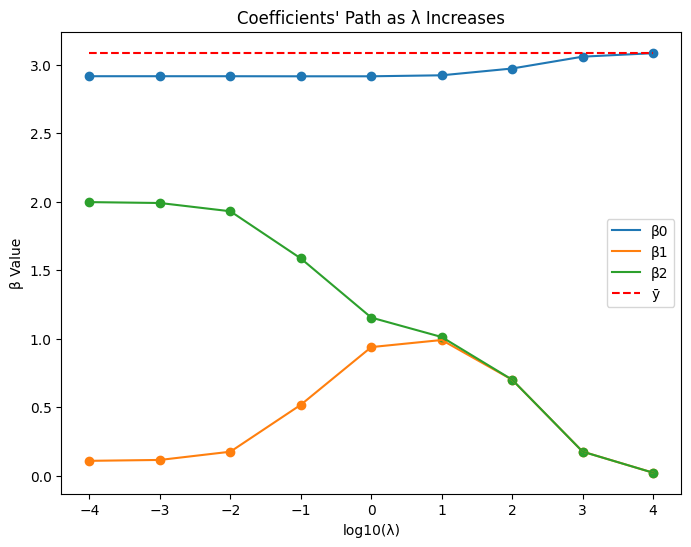

In [11]:
# Instantiates and fits the ridge regression model for various lambdas
lambda_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
coeffs = []
for lamb in lambda_values:
    second_section_model_ridge = RidgeRegression(lamb)
    second_section_model_ridge.fit(X_train, y_train)
    coeffs.append(second_section_model_ridge.coef.flatten())
coeffs = np.array(coeffs)

# Presents the result
metrics = pd.DataFrame.from_dict(
    {
        "λ=10^" + str(np.log10(lambda_values[i])): coeffs[i]
        for i in range(len(lambda_values))
    },
    columns=["β0", "β1", "β2"],
    orient="index",
)
display(metrics)

y_mean = np.mean(y_train)
log_lambda = np.log10(lambda_values)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax.plot(log_lambda, coeffs[:, 0], label="β0")
ax.scatter(log_lambda, coeffs[:, 0])

ax.plot(log_lambda, coeffs[:, 1], label="β1")
ax.scatter(log_lambda, coeffs[:, 1])

ax.plot(log_lambda, coeffs[:, 2], label="β2")
ax.scatter(log_lambda, coeffs[:, 2])

ax.hlines([y_mean], -4, 4, color="red", linestyle="--", label="ȳ")

ax.set_title("Coefficients' Path as λ Increases")
ax.set_xlabel("log10(λ)")
ax.set_ylabel("β Value")

ax.legend()

plt.show()
plt.close()

O gráfico acima indica a progressão dos valores de cada coeficiente do modelo de Regressão Ridge conforme o valor do parâmetro lambda aumenta. É possível observar que o valor do intercepto tende à média dos valores de Y, enquanto o valor dos demais coeficientes tende a zero.

##### **Tarefa C**

In [12]:
# Separates data into train and test partitions
np.random.shuffle(third_section_data)  # Randomizes order

X = third_section_data[:, :-1]
X = np.concat(
    [np.ones((X.shape[0], 1)), X], axis=1
)  # An intercept column of 1's is added to X
y = third_section_data[:, -1:]

split_point = int(0.7 * X.shape[0])
X_train, y_train = X[:split_point], y[:split_point]
X_test, y_test = X[split_point:], y[split_point:]

In [13]:
# Instantiates and fits an OSL model
third_section_model_OLS = LinearRegression()
third_section_model_OLS.fit(X_train, y_train)

# Computes some metrics
train_mse = third_section_model_OLS.mse(X_train, y_train)
train_mae = third_section_model_OLS.mae(X_train, y_train)
train_r2 = third_section_model_OLS.r2(X_train, y_train)

test_mse = third_section_model_OLS.mse(X_test, y_test)
test_mae = third_section_model_OLS.mae(X_test, y_test)
test_r2 = third_section_model_OLS.r2(X_test, y_test)

# Presents the results in table form
coef = third_section_model_OLS.coef.flatten()
coef = pd.DataFrame.from_dict(
    {"OLS n<p": coef},
    columns=[f"β{i}" for i in range(len(coef))],
    orient="index",
)
display(coef)

metrics = pd.DataFrame.from_dict(
    {"Train": [train_mse, train_mae, train_r2], "Test": [test_mse, test_mae, test_r2]},
    columns=["MSE", "MAE", "R^2"],
    orient="index",
)
display(metrics)

,β0,β1,β2,β3,β4,β5,β6,β7,β8,β9,...,β11,β12,β13,β14,β15,β16,β17,β18,β19,β20
OLS n<p,1.727253,48.772153,-47.606658,-105.536569,108.137762,-29.811999,24.9045,33.907572,-28.24047,2.533273,...,2.64926,-2.822809,-4.514404,20.928581,2.175541,-3.281574,8.201261,-4.949633,5.452581,0.433486


,MSE,MAE,R^2
Train,33.268724,4.786467,-3.412629
Test,248.670153,13.264489,-560.222316


A partir das tabelas acima, é possível observar que a abordagem OSL apresentou elevados valores de erro médio absoluto e quadrático. Além disso, o valor do coeficiente de determinação ficou negativo. Normalmente, o valor desta métrica fica dentro do intervalo [0, 1] caso o ajuste do modelo resulte em uma função que, ao menos, segue a tendência dos dados reais, de modo a indicar o quão próxima ela ficou de uma predição baseada apenas na média da base de treino. Considerando isso, um valor negativo indica que o ajuste nem sequer segue bem o comportamento natural dos dados, isto é, um modelo que possui uma capacidade de inferência pior do que o modelo da média. Portanto, é possível concluir que, de fato, a abordagem OSL falha em uma base de treino sob o regime $n<p$.

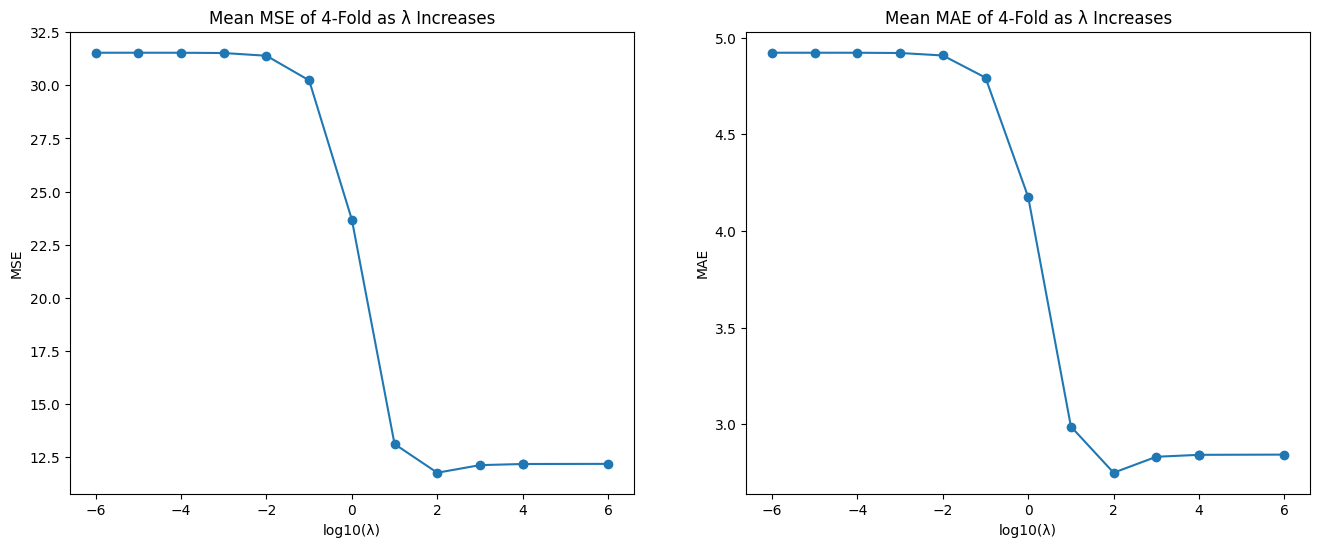

In [14]:
# Separates data into 4 folds
fold_split = int(X_train.shape[0] / 4)

# K-Fold Validation
lambda_values = [
    0.000001,
    0.00001,
    0.0001,
    0.001,
    0.01,
    0.1,
    1,
    10,
    100,
    1000,
    10000,
    10000,
    1000000,
]
mse = []
mae = []
r2 = []
for lamb in lambda_values:
    mean_mse = 0
    mean_mae = 0
    mean_r2 = 0

    for i in range(4):
        fold_X_train = np.concat(
            [X_train[: i * fold_split], X_train[(i + 1) * fold_split :]]
        )
        fold_y_train = np.concat(
            [y_train[: i * fold_split], y_train[(i + 1) * fold_split :]]
        )
        fold_X_val = X_train[i * fold_split : (i + 1) * fold_split]
        fold_y_val = y_train[i * fold_split : (i + 1) * fold_split]

        third_section_model_ridge = RidgeRegression(lamb)
        third_section_model_ridge.fit(fold_X_train, fold_y_train)

        mean_mse += third_section_model_ridge.mse(fold_X_val, fold_y_val)
        mean_mae += third_section_model_ridge.mae(fold_X_val, fold_y_val)
        mean_r2 += third_section_model_ridge.r2(fold_X_val, fold_y_val)

    mse.append(mean_mse / 4)
    mae.append(mean_mae / 4)
    r2.append(mean_r2 / 4)

# Presents the results
log_lambda = np.log10(lambda_values)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 6)

ax[0].plot(log_lambda, mse, label="MSE")
ax[0].scatter(log_lambda, mse)

ax[1].plot(log_lambda, mae, label="MAE")
ax[1].scatter(log_lambda, mae)

ax[0].set_title("Mean MSE of 4-Fold as λ Increases")
ax[0].set_xlabel("log10(λ)")
ax[0].set_ylabel("MSE")

ax[1].set_title("Mean MAE of 4-Fold as λ Increases")
ax[1].set_xlabel("log10(λ)")
ax[1].set_ylabel("MAE")

plt.show()
plt.close()

A partir dos gráficos acima, gerados a partir de uma validação cruzada K-Fold (4 folds) para o parâmetro λ, é possível observar que um valor igual a 10^2 parece apresentar os melhores resultados. O reduzir leva a um aumento do erro, enquanto o aumentar não parece afetar muito a tendência do gráfico, mas ainda leva a uma pequena piora.

##### **Tarefa D**

In [15]:
# Instantiates and fits an OSL model
third_section_model_ridge = RidgeRegression(100)
third_section_model_ridge.fit(X_train, y_train)

# Computes some metrics
train_mse = third_section_model_ridge.mse(X_train, y_train)
train_mae = third_section_model_ridge.mae(X_train, y_train)
train_r2 = third_section_model_ridge.r2(X_train, y_train)

test_mse = third_section_model_ridge.mse(X_test, y_test)
test_mae = third_section_model_ridge.mae(X_test, y_test)
test_r2 = third_section_model_ridge.r2(X_test, y_test)

# Presents the results in table form
coef = third_section_model_ridge.coef.flatten()
coef = pd.DataFrame.from_dict(
    {"Ridge n < p": coef},
    columns=[f"β{i}" for i in range(len(coef))],
    orient="index",
)
display(coef)

metrics = pd.DataFrame.from_dict(
    {"Train": [train_mse, train_mae, train_r2], "Test": [test_mse, test_mae, test_r2]},
    columns=["MSE", "MAE", "R^2"],
    orient="index",
)
display(metrics)

,β0,β1,β2,β3,β4,β5,β6,β7,β8,β9,...,β11,β12,β13,β14,β15,β16,β17,β18,β19,β20
Ridge n < p,1.470415,0.091791,0.092308,-0.065328,-0.064785,0.022103,0.022572,0.042033,0.044281,-0.020632,...,0.039432,0.041961,0.011113,-0.004027,0.026072,-0.054185,-0.091857,-0.07783,0.037246,-0.004115


,MSE,MAE,R^2
Train,6.052106,2.007147,0.197273
Test,8.005016,2.751482,-17.066477


As tabelas acima apresentam, respectivamente, os coeficientes e os valores de métricas de validação para o modelo de Regressão Ridge ajustado sobre a base de dados em regime $n < p$, treinado com parâmetros selecionados via validação cruzada K-Fold.

##### **Tarefa E**

*Desenho anexado no .pdf*

##### **Tarefa F**

Em termos matemáticos, a regularização L2 consiste em adicionar um termo $λ||β||_2$ à função de perda da regressão linear, neste caso, via mínimos quadrados, o que leva à expressão $J(β)=(1/n)*\sum_{i=1}^{n}(y_i-ŷ_i)^2+λ||β||_2$. O resultado disso é que, agora, não apenas o erro deve ser reduzido, como a norma L2 do vetor de coeficientes $β$ também não deve crescer substancialmente. A ideia dessa intervenção é criar um contra-balanço ao ajuste do modelo, em que o coeficiente associado a qualquer preditor deve crescer apenas se o seu impacto na redução do erro compensar tal aumento, proporção que é controlada por meio do parâmetro $λ$. Em um cenário de multicolinearidade, portanto, no qual vários preditores estão correlacionados, o efeito da regularização é justamente de seleção de variáveis, isto é, de prover uma maior segurança de que apenas aquelas com um impacto substancial no erro do modelo serão relevadas para fins de inferência. Na regressão convencional via mínimos quadrados, o efeito de confusão originado por múltiplas variáveis correlacionadas ocasiona uma alta variância no modelo, o que é reduzido por meio da regularização.

Em termos algébricos, tem-se que, se $n<p$, a matriz $X$ é singular, já que há mais vetores coluna do que sua dimensão, de modo que um deles possa ser construído a partir de uma combinação linear dos outros e, portanto, existe um vetor não-nulo $v$ tal que $Xv=0$. Por consequência, $X^TXv=X^T0=0$ e $X^TX$ também é singular, isto é, não invertível. Outra forma de representar isso seria que um dos autovalores de $X^TX$ é igual a 0. Somar um pequeno termo positivo $λ$ à diagonal principal de $X^TX$ equivale a somar esse mesmo termo a cada um de seus autovalores, movendo-os para longe de zero, potencialmente invalidando $X^TXv=0$, de modo que $X^TX$ passe a ser não-singular/invertível.

*Redigido à mão no .pdf*